In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.filters import frangi, hessian, gaussian, unsharp_mask, threshold_otsu, threshold_yen, median
from skimage.color import rgb2gray
from skimage import feature, exposure
from sklearn.neighbors import KNeighborsClassifier
from skimage.transform import resize
from imblearn.under_sampling import RandomUnderSampler
import pickle
import time
from skimage import io
import skimage.morphology as mp
import math 

In [20]:
input_image = cv2.imread('healthy/01_h.jpg')
def simple(img):
    img = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    #plt.imshow(img, cmap=plt.cm.gray)
    #plt.show()

    img = exposure.equalize_hist(img)
    #plt.imshow(img, cmap=plt.cm.gray)
    #plt.show()

    img = gaussian(img, sigma=(10), truncate=4, mode='reflect', channel_axis=-1)
    #plt.imshow(img, cmap=plt.cm.gray)
    #plt.show()

    img = unsharp_mask(img, radius=10, amount=1.0)
    #plt.imshow(img, cmap=plt.cm.gray)
    #plt.show()

    img = rgb2gray(img)

    img = frangi(img)
    #plt.imshow(img, cmap=plt.cm.gray)
    #plt.show()

    img = mp.dilation(img, mp.disk(5))
    img = mp.erosion(img, mp.disk(5))
    #plt.imshow(img, cmap=plt.cm.gray)
    #plt.show()

    thresh = threshold_otsu(img)
    img = img > thresh * 0.1
    #plt.imshow(img, cmap=plt.cm.gray)
    #plt.show()
    return img


In [23]:
def miary(img, manualsegm, fov):
    result = []
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                if fov[x][y] == 0:
                    img[x][y] = 0


    result = np.zeros(shape=(manualsegm.shape[0], manualsegm.shape[1],3))
    plt.show()

    plt.imshow(manualsegm, cmap=plt.cm.gray)
    plt.show()
    plt.imshow(img, cmap=plt.cm.gray)
    plt.show()

    for x in range(manualsegm.shape[0]):
            for y in range(manualsegm.shape[1]):
                if img[x][y]==1 and manualsegm[x][y]==255:
                    TP+=1
                    result[x][y][1]=255
                if img[x][y]==1 and manualsegm[x][y]==0:
                    FP+=1
                    result[x][y][0]=255
                if img[x][y]==0 and manualsegm[x][y]==255:
                    FN+=1
                    result[x][y][2]=255
                if img[x][y]==0 and manualsegm[x][y]==0:
                        TN+=1


    accuracy = (TP+TN)/(TP+FP+FN+TN)
    sensitivity = TP/(TP+FN)
    specifity = TN/(FP+TN)
    precision = TP/(TP+FP)
    gmean = math.sqrt(sensitivity*specifity)
    fmeasure = (2*precision*sensitivity)/(precision + sensitivity)

    plt.imshow(result.astype('uint8'))
    plt.show()
    
    print(f"true positive: {TP}")
    print(f"false positive: {FP}")
    print(f"false negative: {FN}")
    print(f"true negative: {TN}")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specifity: {specifity}")
    print(f"Precision: {precision}")
    print(f"G-mean: {gmean}")
    print(f"F-mesure: {fmeasure}")


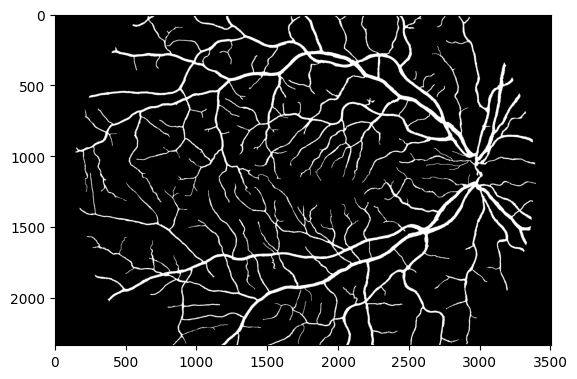

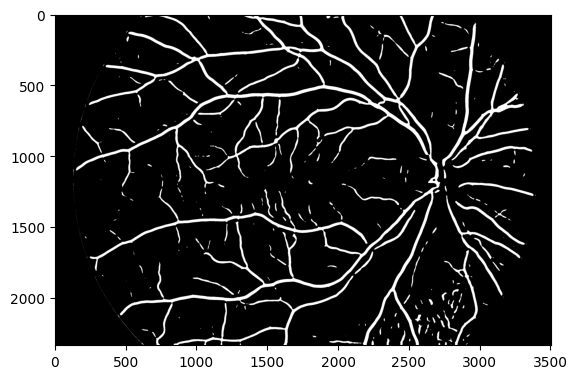

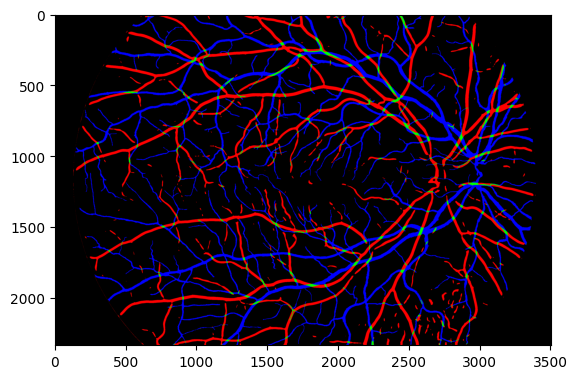

true positive: 79491
false positive: 628873
false negative: 685265
true negative: 6791116
Accuracy: 0.8394405690097859
Sensitivity: 0.1039429569692817
Specifity: 0.9152461007691521
Precision: 0.11221772986769514
G-mean: 0.30843700502460925
F-mesure: 0.1079219615509938


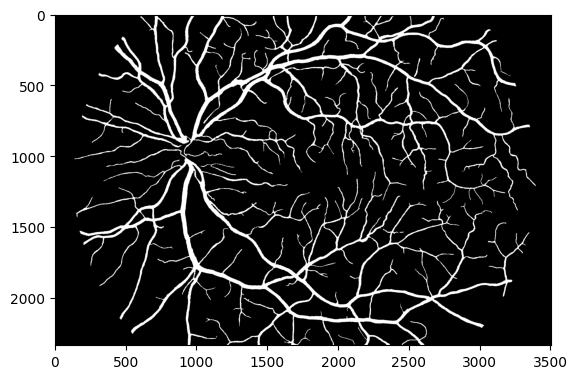

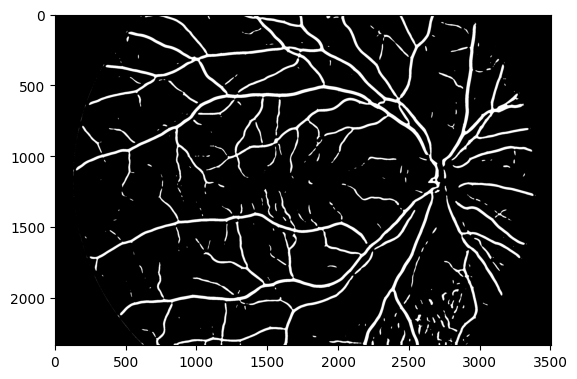

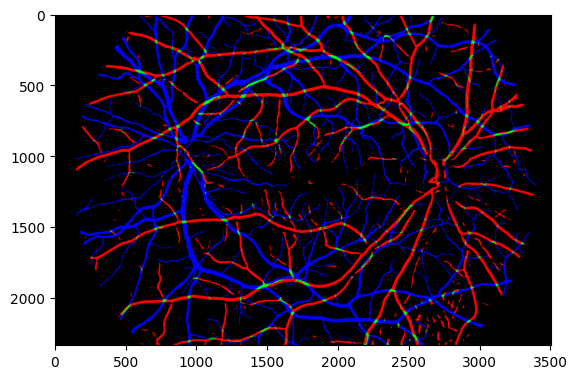

true positive: 94096
false positive: 613669
false negative: 763615
true negative: 6712380
Accuracy: 0.8317052308474344
Sensitivity: 0.10970594990620383
Specifity: 0.9162346579991479
Precision: 0.13294808305016495
G-mean: 0.31704320445766115
F-mesure: 0.12021391576747265


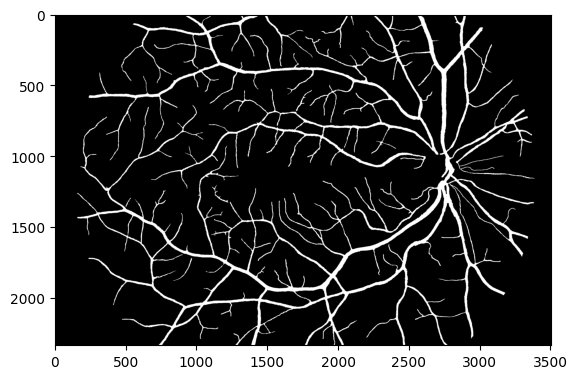

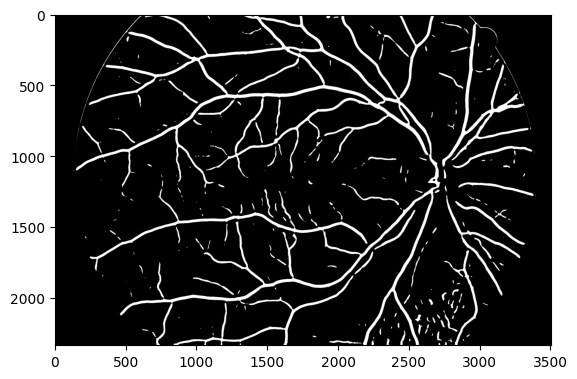

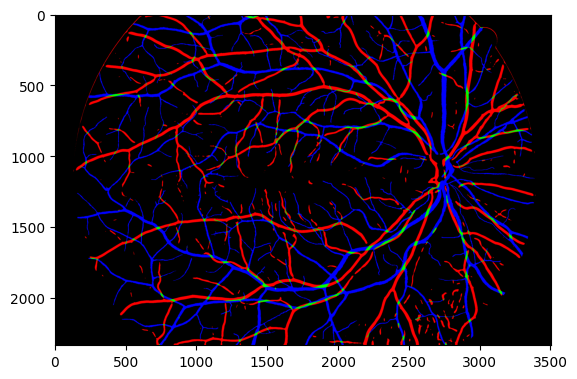

true positive: 82287
false positive: 630502
false negative: 629122
true negative: 6842314
Accuracy: 0.8460912303852839
Sensitivity: 0.11566763985274293
Specifity: 0.9156272548394072
Precision: 0.11544370073051072
G-mean: 0.32543577484984687
F-mesure: 0.11555556179688498


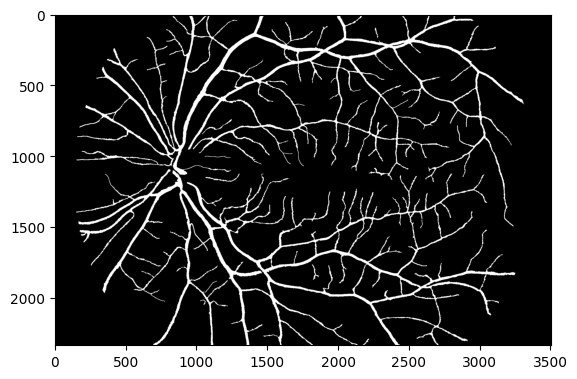

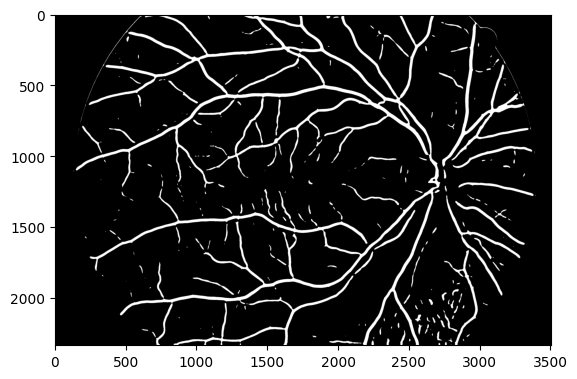

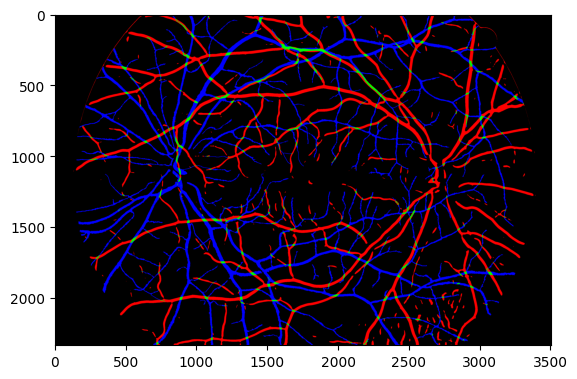

true positive: 76893
false positive: 634212
false negative: 637161
true negative: 6837078
Accuracy: 0.8446769005676488
Sensitivity: 0.10768513305716375
Specifity: 0.9151134543030721
Precision: 0.10813171050688716
G-mean: 0.31391736825003336
F-mesure: 0.10790795974343916


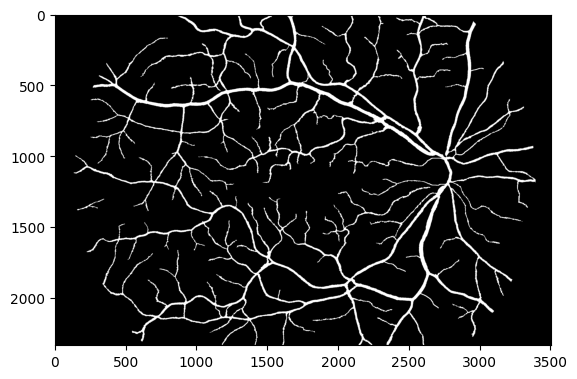

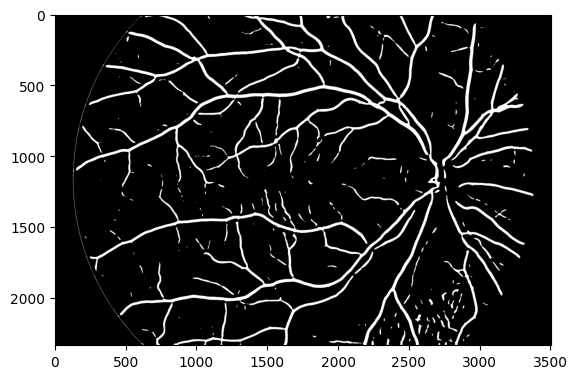

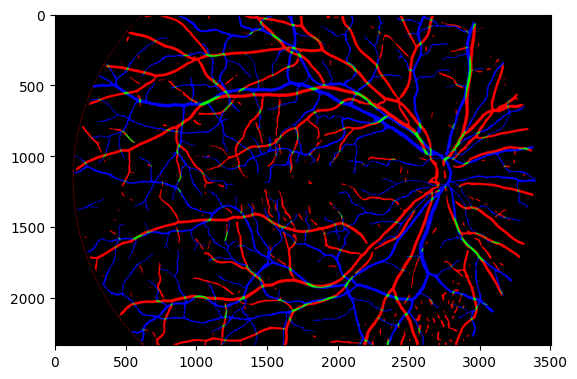

true positive: 79806
false positive: 632217
false negative: 561439
true negative: 6911882
Accuracy: 0.8541715534496779
Sensitivity: 0.12445477157716629
Specifity: 0.9161971495867167
Precision: 0.1120834579781833
G-mean: 0.3376760384917261
F-mesure: 0.11794559540312784


In [24]:
h_image = io.ImageCollection('holdout/healthy/*.jpg')
h_manualsegm = io.ImageCollection('holdout/manualsegm/*.tif')
h_fov = []
h_fov.append(cv2.imread('holdout/fov/11_h_mask.tif', cv2.IMREAD_GRAYSCALE))
h_fov.append(cv2.imread('holdout/fov/12_h_mask.tif', cv2.IMREAD_GRAYSCALE))
h_fov.append(cv2.imread('holdout/fov/13_h_mask.tif', cv2.IMREAD_GRAYSCALE))
h_fov.append(cv2.imread('holdout/fov/14_h_mask.tif', cv2.IMREAD_GRAYSCALE))
h_fov.append(cv2.imread('holdout/fov/15_h_mask.tif', cv2.IMREAD_GRAYSCALE))

for i in range(len(h_image)):
    miary(simple(h_image[i]), h_manualsegm[i], h_fov[i])

In [78]:
def get_x(img, step):
    stats = []


    if(step==1):
        img_width = img.shape[0]
        img_height = img.shape[1]
    else:
        img_width = int((img.shape[0]) / 5) * 5
        img_height = int((img.shape[1])/ 5) * 5
        

    for x in range(0, img_width, step):
        for y in range(0, img_height, step):
            x_block_end = x+5
            y_block_end = y+5
            block = img[x:x_block_end, y:y_block_end]

            green_variance = np.var(block[:,:,1])

            moments = cv2.moments(rgb2gray(block))
            tmp = cv2.HuMoments(moments)

            hu_moments =[]
            for i in range(len(tmp)):
                hu_moments.append(tmp[i][0])
            stats.append([green_variance, *list(moments.values()), *hu_moments])
            
    return stats

def get_y(manualsegm):
    pixels = []
    img_width = manualsegm.shape[0]
    img_height = manualsegm.shape[1]

    for x in range(2, img_width-2, 5):
        for y in range(2, img_height-2, 5):
            if manualsegm[x][y]==255: 
                pixels.append(1)
            else:
                pixels.append(0)
    return pixels



def train(n, n_neig):
    x_train = []
    y_train = []
    num = 0
    
    img_tab = io.ImageCollection('learn/healthy/*.jpg')
    manualsegm_tab = io.ImageCollection('learn/manualsegm/*.tif')
    lista = []
    for i in range(len(img_tab)):
        lista.append((img_tab[i], manualsegm_tab[i]))

    
    for (img, manualsegm) in lista:
        if num < n:
            x_train = get_x(img, 5)
            y_train = get_y(manualsegm)
            num+=1
            
            
    sampler = RandomUnderSampler()
    x_train, y_train = sampler.fit_resample(x_train, y_train)
    
    knn_model = KNeighborsClassifier(n_neighbors=n_neig, n_jobs=-1)
    knn_model.fit(x_train, y_train)
    
    knnPickle = open('serialized_file', 'wb')
    pickle.dump(knn_model, knnPickle)
    
    
def predict(n):
    img_tab = io.ImageCollection('holdout/healthy/*.jpg')
    knn_model = pickle.load(open('serialized_file', 'rb'))
    
    result = []
    
    for i in range(n):
        test = get_x(img_tab[i], 1)
        predict = knn_model.predict(test)
        predict = np.array(predict)
        mask = predict.reshape(img_tab[i].shape[0], img_tab[i].shape[1])

        result.append(mask)
        
    return result



In [79]:
train(8, 7)

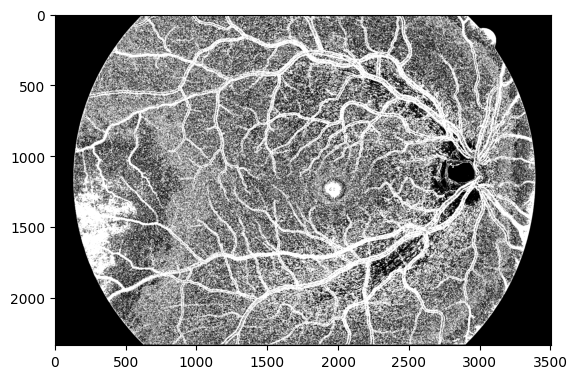

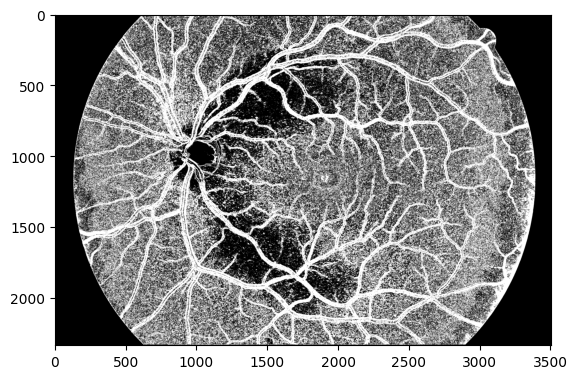

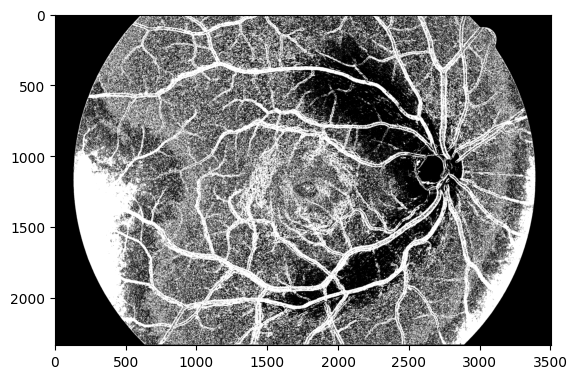

In [80]:
predicted = predict(3)

for i in range(len(predicted)):
    plt.imshow(predicted[i], cmap=plt.cm.gray)
    plt.show()

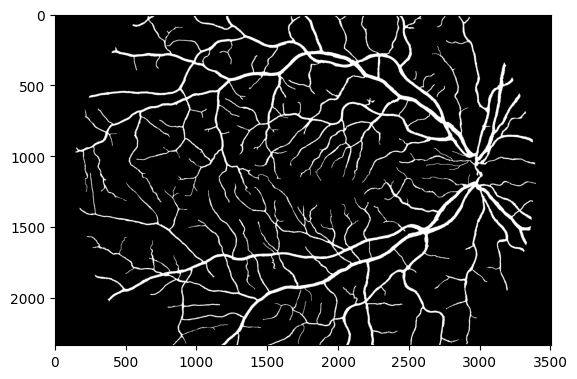

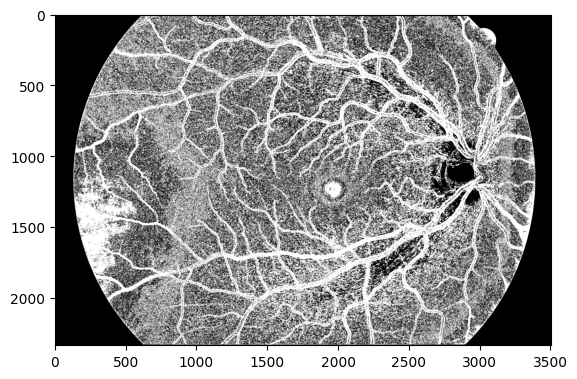

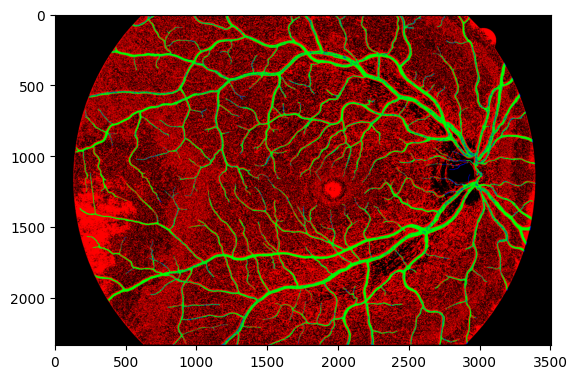

true positive: 667025
false positive: 3382476
false negative: 97731
true negative: 4037513
Accuracy: 0.5747934724905908
Sensitivity: 0.872206298479515
Specifity: 0.5441400250054279
Precision: 0.16471782572716984
G-mean: 0.6889138966986622
F-mesure: 0.27710402664419453


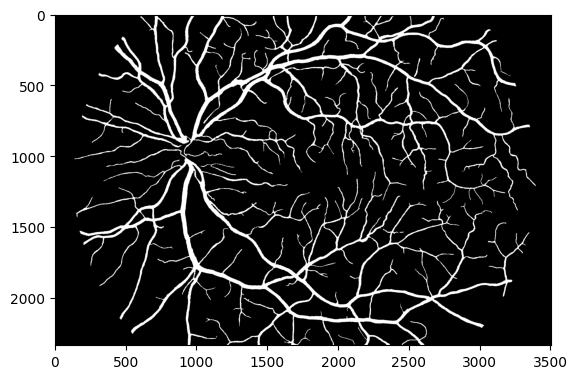

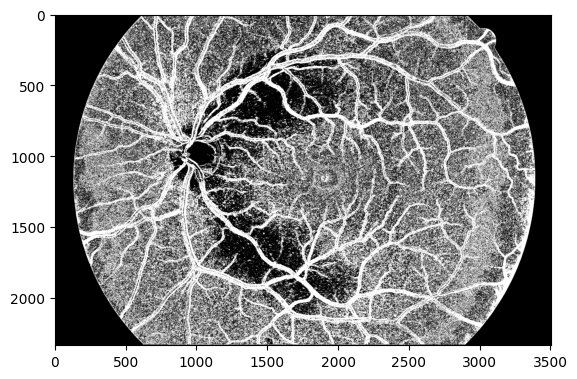

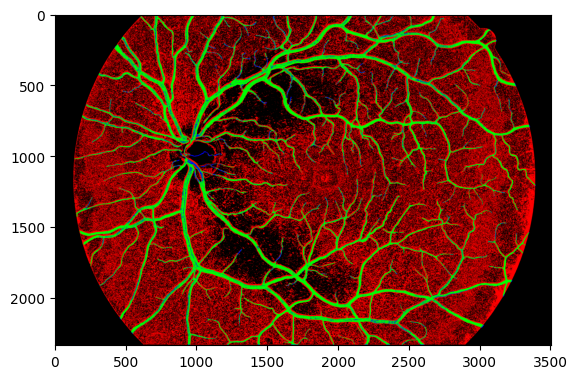

true positive: 746752
false positive: 3004768
false negative: 110959
true negative: 4321281
Accuracy: 0.6192792799397832
Sensitivity: 0.8706335817075915
Specifity: 0.5898515011297358
Precision: 0.19905318377617606
G-mean: 0.7166202098072461
F-mesure: 0.3240245498652595


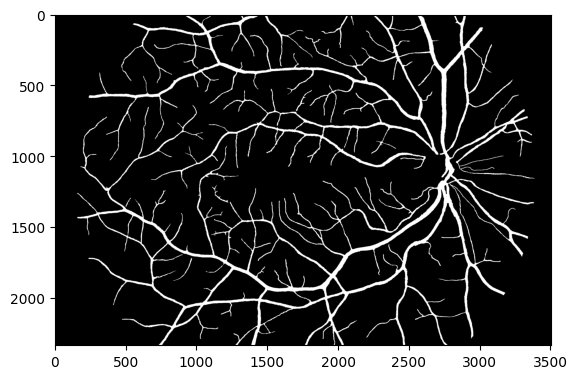

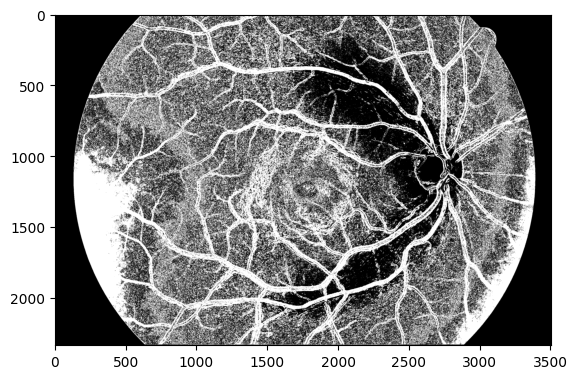

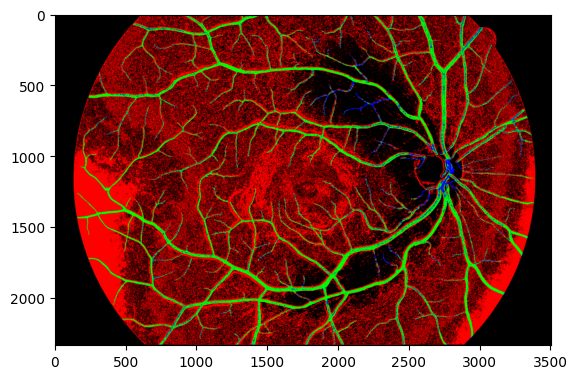

true positive: 585690
false positive: 2998337
false negative: 125719
true negative: 4474479
Accuracy: 0.6182832216856208
Sensitivity: 0.8232816846567867
Specifity: 0.5987674525908305
Precision: 0.16341673765292505
G-mean: 0.702107026803344
F-mesure: 0.27270339960832846


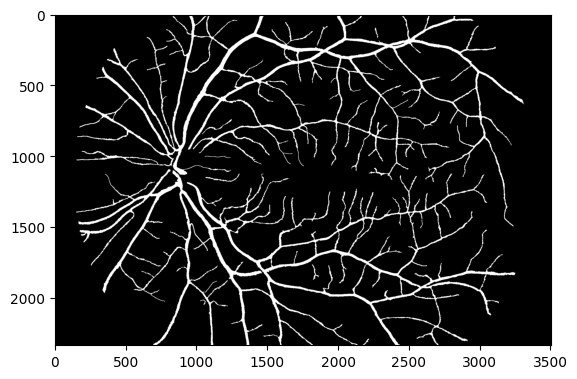

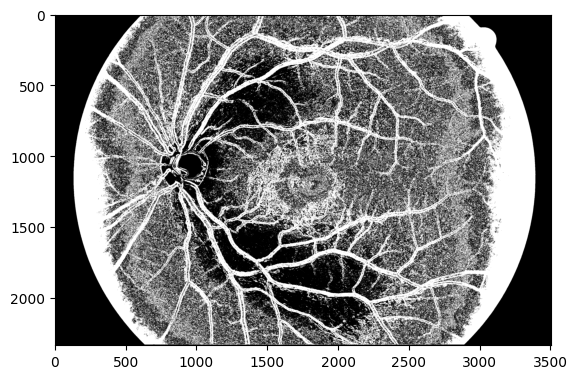

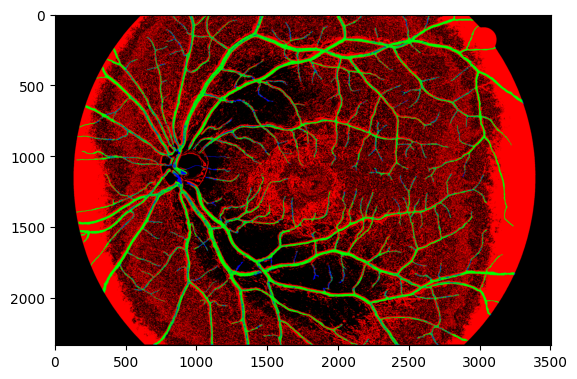

true positive: 591450
false positive: 3066583
false negative: 122604
true negative: 4404707
Accuracy: 0.6103783787217739
Sensitivity: 0.8282987000983119
Specifity: 0.5895510681555661
Precision: 0.16168525543645998
G-mean: 0.6988021060320487
F-mesure: 0.2705572876294548


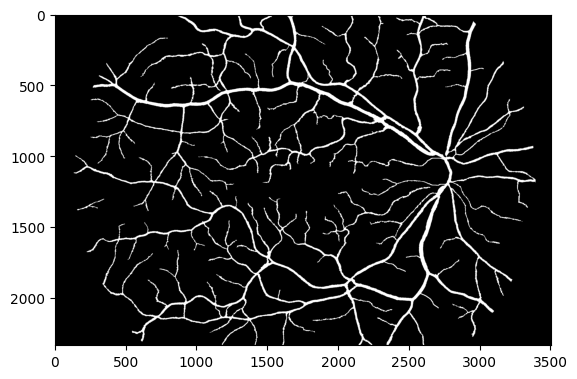

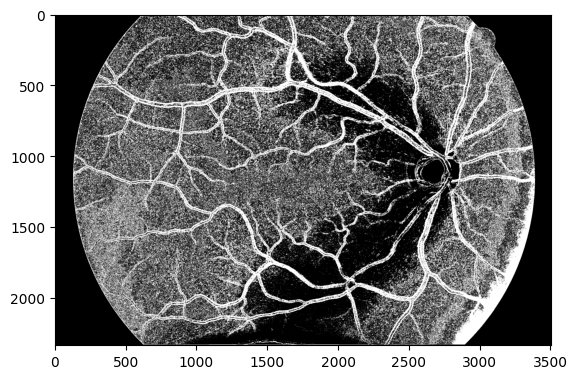

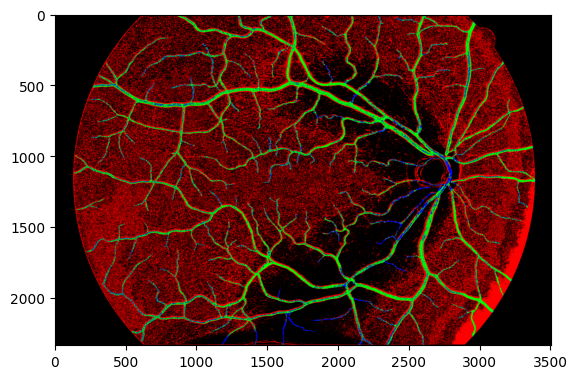

true positive: 470797
false positive: 2308638
false negative: 170448
true negative: 5235461
Accuracy: 0.6971311162976168
Sensitivity: 0.7341920794704052
Specifity: 0.6939809512043784
Precision: 0.16938586439330294
G-mean: 0.7138034166894919
F-mesure: 0.2752651519580902


In [76]:
predicted = predict(5)

h_fov = []
h_fov.append(cv2.imread('holdout/fov/11_h_mask.tif', cv2.IMREAD_GRAYSCALE))
h_fov.append(cv2.imread('holdout/fov/12_h_mask.tif', cv2.IMREAD_GRAYSCALE))
h_fov.append(cv2.imread('holdout/fov/13_h_mask.tif', cv2.IMREAD_GRAYSCALE))
h_fov.append(cv2.imread('holdout/fov/14_h_mask.tif', cv2.IMREAD_GRAYSCALE))
h_fov.append(cv2.imread('holdout/fov/15_h_mask.tif', cv2.IMREAD_GRAYSCALE))

for i in range(len(predicted)):
    miary(predicted[i], h_manualsegm[i], h_fov[i])